In [1]:
import numpy as np
import pandas as pd

# Using plotly.express
import plotly.express as px
import talib

import plotly.graph_objects as go

In [2]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/home/usman/.virtualenvs/YOLO/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [3]:
df = pd.read_csv('/home/usman/Downloads/BB.csv')

df.Date = pd.to_datetime(df.Date)

df.sort_values(by='Date', inplace=True)

# df = df[df.Date > pd.to_datetime('2015-01-01')]

In [4]:
df['RSI'] = talib.RSI(df['Adj Close'])

In [5]:
df['sma_80'] = talib.SMA(df['Adj Close'], timeperiod=80)

df['stdev_80'] = talib.STDDEV(df['Adj Close'], timeperiod=80, nbdev=1)

df['nsigma'] = (df['Adj Close'] - df['sma_80'])/df['stdev_80']

def slope_R2_adj(y):
    y = np.log(y)
    x = np.arange(len(y))

    sum_y = sum(y)
    sum_x = sum(x)
    sum_xy = sum(x*y)
    sum_x2 = sum(x**2)
    sum_y2 = sum(y**2)

    l = 21

    m = (l*sum_xy - sum_x*sum_y)/(l*sum_x2 - sum_x**2)

    r_squared = (l*sum_xy - sum_x*sum_y)/(np.sqrt( (l*sum_x2 - sum_x**2) * (l*sum_y2 - sum_y**2 ) ))

    return m*r_squared**2

df['slope_R2_adj'] = df['Close'].rolling(21).apply(slope_R2_adj)

In [6]:
df = df[df.Date > pd.to_datetime('2010-01-01')]

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj
2347,2010-01-04,68.160004,68.230003,65.639999,65.930000,65.930000,20035800,52.701396,66.522000,7.441268,-0.079556,0.004288
2348,2010-01-05,66.959999,67.169998,64.930000,65.800003,65.800003,22082200,52.281616,66.357625,7.308986,-0.076293,0.002796
2349,2010-01-06,65.730003,65.809998,64.400002,65.400002,65.400002,16697900,50.937158,66.183000,7.161405,-0.109336,0.001447
2350,2010-01-07,65.389999,66.260002,64.940002,65.300003,65.300003,11302000,50.586927,65.981625,6.953894,-0.098020,0.000566
2351,2010-01-08,65.059998,65.849998,64.860001,65.459999,65.459999,10639100,51.165483,65.760625,6.680650,-0.045000,0.000124
...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2020-08-24,4.800000,4.840000,4.740000,4.790000,4.790000,2528200,49.136154,4.815375,0.292481,-0.086758,0.000058
5026,2020-08-25,4.800000,4.880000,4.770000,4.780000,4.780000,2470300,48.554807,4.824250,0.280244,-0.157898,0.000007
5027,2020-08-26,4.830000,5.210000,4.800000,5.080000,5.080000,7741000,62.781382,4.834500,0.274353,0.894831,0.000034
5028,2020-08-27,5.120000,5.170000,4.970000,5.030000,5.030000,3544300,59.812578,4.844000,0.267720,0.694756,0.000251


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj
Date,,,,,,,,,,,
2010-01-04,68.160004,68.230003,65.639999,65.930000,65.930000,20035800,52.701396,66.522000,7.441268,-0.079556,0.004288
2010-01-05,66.959999,67.169998,64.930000,65.800003,65.800003,22082200,52.281616,66.357625,7.308986,-0.076293,0.002796
2010-01-06,65.730003,65.809998,64.400002,65.400002,65.400002,16697900,50.937158,66.183000,7.161405,-0.109336,0.001447
2010-01-07,65.389999,66.260002,64.940002,65.300003,65.300003,11302000,50.586927,65.981625,6.953894,-0.098020,0.000566
2010-01-08,65.059998,65.849998,64.860001,65.459999,65.459999,10639100,51.165483,65.760625,6.680650,-0.045000,0.000124


In [37]:
# look ahead 5 days to see if it is a good day to buy, hold or sell

df['actions'] = 'Do Nothing'

In [38]:
df_actions = df['actions']

In [39]:
df_actions = df_actions.to_frame()

df_actions.head()

,actions
Date,
2010-01-04,Do Nothing
2010-01-05,Do Nothing
2010-01-06,Do Nothing
2010-01-07,Do Nothing
2010-01-08,Do Nothing


In [136]:
df['actions'] = 'Do Nothing'

df_actions = df['actions']
df_actions = df_actions.to_frame()

long = 21
short = 14

move_ahead_long = long
move_ahead_short = short
max_date = max(df.index)

start = min(df.index)

while start < max_date - pd.DateOffset(days=move_ahead_long):
    # what is the current status        
    status = df_actions.loc[start]['actions']
    # we don't own any stocks
    if status == 'Do Nothing':
        # is the price going to be higher by 5% N days from today
        while start + pd.DateOffset(days=move_ahead_long) not in df.index:
            move_ahead_long +=1
        if df.loc[start]['Adj Close']*1.1 < df.loc[start + pd.DateOffset(days=move_ahead_long)]['Adj Close']:
#             print('here')
            # buy today
            df_actions.loc[start, 'actions'] = 'BUY'
            # Going forward I am holding
            df_actions.loc[df_actions.index > start, 'actions'] = 'HOLD'
        # move things ahead
        start = start + pd.DateOffset(days=move_ahead_long)
                
        # else don't buy and stay as you are
    # we bought yesterday so in a holding pattern today
    elif status == 'HOLD':
        # check if the price is going to lower by 5% N days from now
        while start + pd.DateOffset(days=move_ahead_short) not in df.index:
            move_ahead_short +=1
        # sell if price is going to be lower tomorrow
        if df.loc[start]['Adj Close'] > 0.98*df.loc[start + pd.DateOffset(days=move_ahead_short)]['Adj Close']:
            df_actions.loc[start, 'actions'] = 'SELL'
            # going forward I am out of stocks
            df_actions.loc[df_actions.index > start, 'actions'] = 'Do Nothing'
        # else keep holding
        
        start = start + pd.DateOffset(days=move_ahead_short)
    
#     print(start)
                
    # reset move ahead time frames
    move_ahead_long = long
    move_ahead_short = short

In [137]:
df['actions'] = df_actions

In [138]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj,actions,stockNumbers
Date,,,,,,,,,,,,,
2010-01-04,68.160004,68.230003,65.639999,65.930000,65.930000,20035800,52.701396,66.522000,7.441268,-0.079556,0.004288,Do Nothing,0.0
2010-01-05,66.959999,67.169998,64.930000,65.800003,65.800003,22082200,52.281616,66.357625,7.308986,-0.076293,0.002796,Do Nothing,0.0
2010-01-06,65.730003,65.809998,64.400002,65.400002,65.400002,16697900,50.937158,66.183000,7.161405,-0.109336,0.001447,Do Nothing,0.0
2010-01-07,65.389999,66.260002,64.940002,65.300003,65.300003,11302000,50.586927,65.981625,6.953894,-0.098020,0.000566,Do Nothing,0.0
2010-01-08,65.059998,65.849998,64.860001,65.459999,65.459999,10639100,51.165483,65.760625,6.680650,-0.045000,0.000124,Do Nothing,0.0


In [139]:
df_actions.head()

,actions
Date,
2010-01-04,Do Nothing
2010-01-05,Do Nothing
2010-01-06,Do Nothing
2010-01-07,Do Nothing
2010-01-08,Do Nothing


In [140]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'],
                    mode='lines',
                    name='markers'))
fig.add_trace(go.Scatter(x=df[df['actions'] == 'BUY'].index, y=df[df['actions'] == 'BUY']['Adj Close'],
                    mode='markers',
                    name='BUY'))

fig.add_trace(go.Scatter(x=df[df['actions'] == 'SELL'].index, y=df[df['actions'] == 'SELL']['Adj Close'],
                    mode='markers',
                    name='SELL'))

# fig.add_trace(go.Scatter(x=df[df['actions'] == 'HOLD'].index, y=df[df['actions'] == 'HOLD']['Adj Close'],
#                     mode='markers',
#                     name='HOLD'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y1,
#                     mode='lines+markers',
#                     name='lines+markers'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='lines',
#                     name='lines'))

fig.show()

In [141]:
df['stockNumbers'] = 0

In [142]:
cash = 10000

for index, row in df.iterrows():
    if row['actions'] == 'BUY':
        stockNumbers = cash // row['Adj Close']
        cash = cash - stockNumbers * row['Adj Close']
        df.loc[df.index >= index, 'stockNumbers'] = stockNumbers
    elif row['actions'] == 'SELL':
        cash = cash + stockNumbers * row['Adj Close']
        df.loc[df.index >= index, 'stockNumbers'] = 0

cash = cash + df.loc[max(df.index)]['stockNumbers']*df.loc[max(df.index)]['Adj Close']

In [143]:
cash

2855727.047947

In [144]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj,actions,stockNumbers
Date,,,,,,,,,,,,,
2020-08-24,4.80,4.84,4.74,4.79,4.79,2528200,49.136154,4.815375,0.292481,-0.086758,0.000058,Do Nothing,0.0
2020-08-25,4.80,4.88,4.77,4.78,4.78,2470300,48.554807,4.824250,0.280244,-0.157898,0.000007,Do Nothing,0.0
2020-08-26,4.83,5.21,4.80,5.08,5.08,7741000,62.781382,4.834500,0.274353,0.894831,0.000034,Do Nothing,0.0
2020-08-27,5.12,5.17,4.97,5.03,5.03,3544300,59.812578,4.844000,0.267720,0.694756,0.000251,Do Nothing,0.0
2020-08-28,5.13,5.30,5.10,5.23,5.23,3987300,66.613479,4.853250,0.268113,1.405192,0.000562,Do Nothing,0.0


In [145]:
df.actions.unique()

array(['Do Nothing', 'BUY', 'HOLD', 'SELL'], dtype=object)

In [146]:
df.groupby('actions').size()

actions
BUY             24
Do Nothing    2121
HOLD           514
SELL            24
dtype: int64

In [147]:
len(df)

2683

In [148]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [149]:
df_train = df[df.index <= '2018-12-31']
df_test = df[df.index > '2018-12-31']

In [150]:
df_train.groupby('actions').size()

actions
BUY             22
Do Nothing    1751
HOLD           469
SELL            22
dtype: int64

In [151]:
col_names = ['RSI', 'nsigma', 'slope_R2_adj']
X = df_train[col_names].values.tolist()
y = df_train['actions'].values.tolist()

In [152]:
X

[[52.701395867539915, -0.07955635267687558, 0.0042882537643919305],
 [52.28161563020161, -0.07629269093792693, 0.0027959829600472416],
 [50.937158329134554, -0.10933583677179524, 0.0014468691605528353],
 [50.586926532884966, -0.09802021285888698, 0.0005656519643728234],
 [51.165483203029524, -0.04499954182852486, 0.00012444554297549531],
 [47.636510387802154, -0.15664349450585294, 1.2539222718103334e-05],
 [43.19896788814153, -0.3387835160433921, -8.052005476545065e-11],
 [51.824054835826104, 0.08683298981601378, -8.782986285467553e-06],
 [54.93684503538607, 0.32129777539254506, -7.540180575602048e-05],
 [53.828484254151846, 0.34314411651775245, -0.00023451386850972152],
 [50.32213544498371, 0.2329340378672527, -0.0006011941453301847],
 [45.484546985316335, -0.05806849976738396, -0.002194654382234413],
 [44.504254809195416, -0.12509255400379096, -0.002052242207064995],
 [38.77449913922838, -0.6510792952906959, -0.0021170193550736644],
 [38.02913903519729, -0.7083334694305826, -0.002643

In [153]:
y

['Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'BUY',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'HOLD',
 'SELL',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 'Do Nothing',
 '

In [154]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

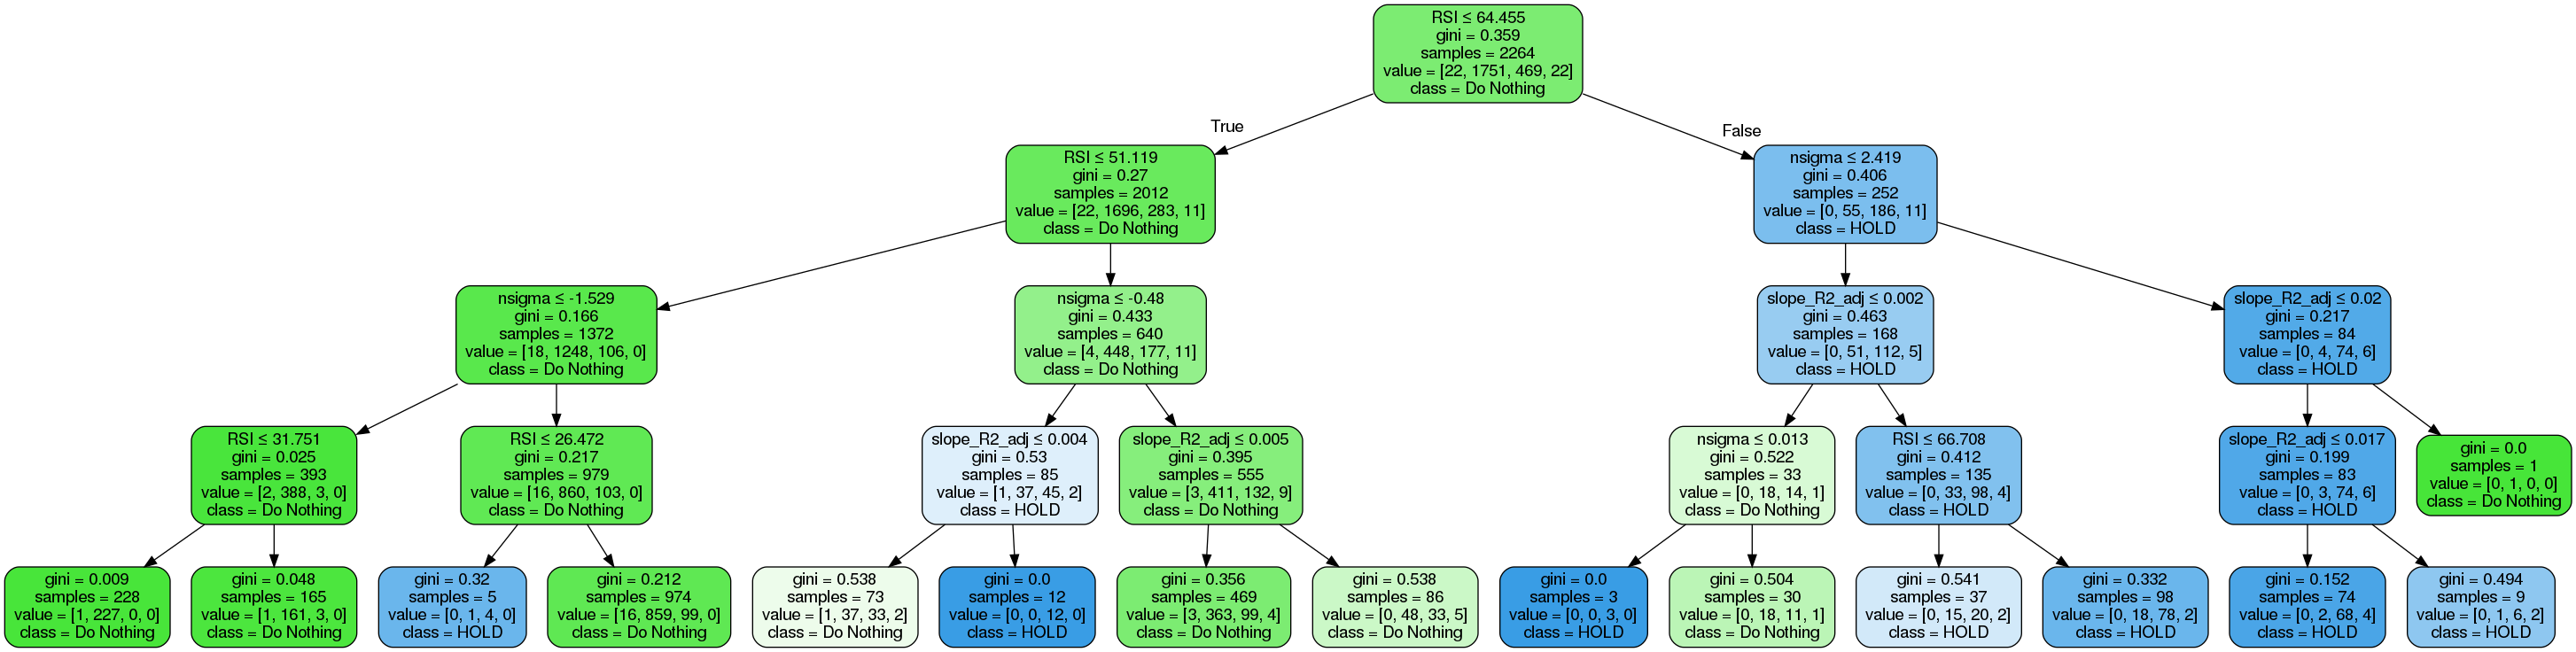

In [155]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY', 'Do Nothing', 'HOLD', 'SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BB.png')
Image(graph.create_png())